# Lista 10 - Aprendizado de Máquina

## Aluno: Ruan Felipe de Almeida Silva - 397048

In [4]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import model_selection

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import naive_bayes
from sklearn import tree
import ensemble


import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'ensemble'

### Resolva o problema de classificação binária sobre o dataset "Pima Indians Diabetes Database". 


#### Importação dos dados

In [ ]:
dataframe = pd.read_csv('diabetes.csv', delimiter=',')
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Verificando os tipos de dados do dataset

In [ ]:
dataframe.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### Verificando se existem valores faltantes no conjunto de dados

In [ ]:
dataframe.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Dividindo o dataset nas features e no target e verificando os valores de target desse dataset

In [ ]:
X = dataframe.drop('Outcome', axis=1)
y = dataframe['Outcome']
np.unique(y)

array([0, 1])

#### Exibindo a quantidade de amostras existente em cada classe.

In [ ]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### 1. Separe os dados em treino (80%) e teste (20%).

In [ ]:
X_values = X.values
y_values = y.values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_values, y_values, test_size=0.2, random_state=742, stratify=y_values)
print("Conjunto x de treino:", X_train.shape[0])
print("Conjunto x de teste:", X_test.shape[0])
print("Conjunto y de treino:", y_train.shape[0])
print("Conjunto y de teste:", y_test.shape[0])

Conjunto x de treino: 614
Conjunto x de teste: 154
Conjunto y de treino: 614
Conjunto y de teste: 154


### 2. Crie um modelo de árvore de decisão sobre o conjunto de treino e faça o que se pede:

In [ ]:
dt = tree.DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=42)

#### 1. Mostre a importância das features.

In [ ]:
importances = dt.feature_importances_
importances

array([0.09177047, 0.27047085, 0.08006235, 0.04229144, 0.06500305,
       0.17720561, 0.12129161, 0.15190462])

In [ ]:
columns = X.columns
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
df_importances = pd.DataFrame({
    'Features': columns,
    'Importances': importances 
})
df_importances.sort_values(by='Importances', ascending=False)

,Features,Importances
1,Glucose,0.270471
5,BMI,0.177206
7,Age,0.151905
6,DiabetesPedigreeFunction,0.121292
0,Pregnancies,0.091770
2,BloodPressure,0.080062
4,Insulin,0.065003
3,SkinThickness,0.042291


#### 2. Desenhe a árvore de decisão.

[Text(151.5721153846154, 211.04470588235293, 'X[1] <= 127.5\ngini = 0.454\nsamples = 614\nvalue = [400, 214]'),
 Text(67.2014423076923, 198.25411764705882, 'X[7] <= 28.5\ngini = 0.321\nsamples = 394\nvalue = [315, 79]'),
 Text(28.43653846153846, 185.4635294117647, 'X[5] <= 30.95\ngini = 0.153\nsamples = 216\nvalue = [198, 18]'),
 Text(12.876923076923077, 172.6729411764706, 'X[0] <= 7.5\ngini = 0.032\nsamples = 123\nvalue = [121, 2]'),
 Text(8.584615384615384, 159.88235294117646, 'X[6] <= 0.672\ngini = 0.016\nsamples = 122\nvalue = [121, 1]'),
 Text(4.292307692307692, 147.09176470588235, 'gini = 0.0\nsamples = 106\nvalue = [106, 0]'),
 Text(12.876923076923077, 147.09176470588235, 'X[6] <= 0.686\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(8.584615384615384, 134.30117647058825, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(17.16923076923077, 134.30117647058825, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(17.16923076923077, 159.88235294117646, 'gini = 0.0\nsamples = 1

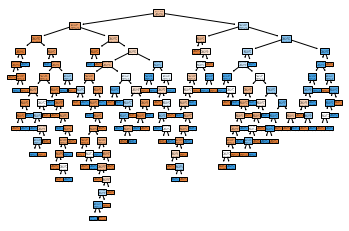

In [ ]:
tree.plot_tree(dt, filled=True)

#### 3. Calcule e mostre F1-Score sobre os dados de treino e sobre os dados de teste.

In [ ]:
y_pred_train = dt.predict(X_train)
f1score_train = metrics.f1_score(y_train, y_pred_train, average='weighted', zero_division=0)
y_pred_test = dt.predict(X_test)
f1score_test = metrics.f1_score(y_test, y_pred_test, average='weighted', zero_division=0)
print(f'F1-Score dos dados de treino: {f1score_train}')
print(f'F1-Score dos dados de teste: {f1score_test}')

F1-Score dos dados de treino: 1.0
F1-Score dos dados de teste: 0.7232230932973366


### 3. Crie um modelo ensemble de Votação (MajorityVoteClassifier) sobre o conjunto de treino usando pelo menos 3 algoritmos de aprendizado de máquina. Compare o resultado de usar os modelos isoladamente com o resultado usando o MajorityVoteClassifier sobre o conjunto de teste usando a métrica F1-Score. Pode se basear no seguinte documento, mas não precisa usar k-Fold Cross Validation.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=24, metric='manhattan');
lr = LogisticRegression(penalty='l2', C=0.1, random_state=42)
dt = tree.DecisionTreeClassifier(random_state=42)
svc = svm.SVC(random_state=42, C=10, kernel='rbf')
nb = naive_bayes.GaussianNB()

clf_models = [knn, lr, dt, svc, nb]
clf_labels = ['KNN', 'Logistic Regression', 'Decision Tree', 'SVC', 'Naive Bayes']

In [ ]:
for model, label in zip(clf_models, clf_labels):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1score = metrics.f1_score(y_test, y_pred, average='weighted', zero_division=0)
    print(f'F1-Score: {f1score} - Model: {label}')
    print("--------------------------------------------------\n")

F1-Score: 0.7387584892172047 - Model: KNN
--------------------------------------------------

F1-Score: 0.7878921078921078 - Model: Logistic Regression
--------------------------------------------------

F1-Score: 0.7232230932973366 - Model: Decision Tree
--------------------------------------------------

F1-Score: 0.762326945372707 - Model: SVC
--------------------------------------------------

F1-Score: 0.7852459996413127 - Model: Naive Bayes
--------------------------------------------------



### 4. Avalie agora as técnicas de Bagging (BaggingClassifier) usando árvores de decisão (DecisionTreeClassifier), RandomForest, AdaBoost e GradientBoosting sobre o conjunto de teste usando a métrica F1-Score. Mostre também a importância das features para cada uma das técnicas. Para usar o BaggingClassifier, você pode se basear no seguinte documento.